# K-Means for Hearing Threshold Data Clustering - In Long Data Format

`Each participant's both ears are treated as if they were two participants.`

In [115]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [116]:
# Load the data
file_path = "../data/nhanes_1520_age.csv"
data = pd.read_csv(file_path)
data.set_index('SEQN', inplace=True)
print(data.shape)
data.head()

(9729, 15)


,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL,RIDAGEYR
SEQN,,,,,,,,,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0,5.0,5.0,5.0,35.0,50.0,50.0,55.0,62
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0,5.0,20.0,50.0,55.0,60.0,55.0,60.0,53
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0,15.0,25.0,30.0,30.0,45.0,60.0,50.0,56
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0,15.0,10.0,15.0,25.0,15.0,25.0,20.0,42
83741,5.0,0.0,5.0,5.0,5.0,20.0,15.0,0.0,-5.0,0.0,5.0,-5.0,10.0,10.0,22


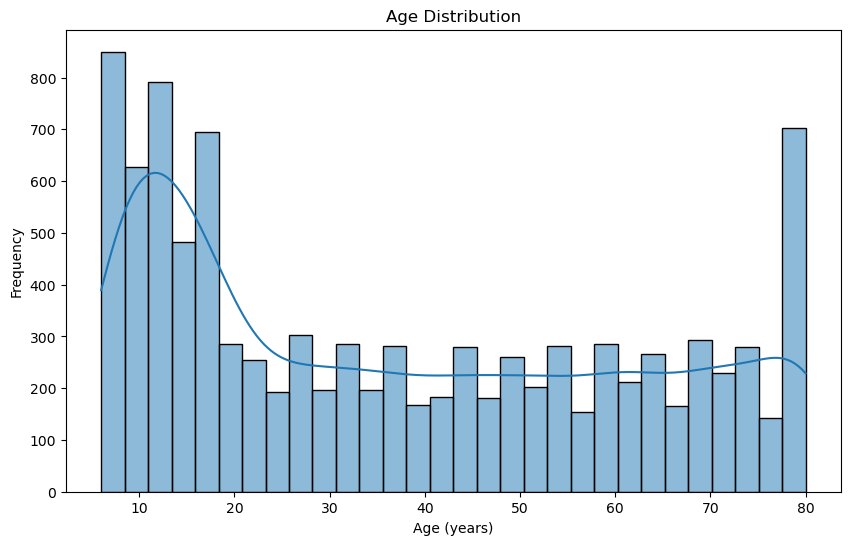

In [117]:
# Check the age distribution in the column 'RIDAGEYR'
plt.figure(figsize=(10, 6))
sns.histplot(data['RIDAGEYR'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

In [118]:
# Select the columns for right ear measurements

right_ear_columns = ['AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR']
right_ear_data = data[right_ear_columns]
right_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Select the columns for left ear measurements

left_ear_columns = ['AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL']
left_ear_data = data[left_ear_columns]
left_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Concatenate the right and left ear data

ear_data = pd.concat([right_ear_data, left_ear_data], axis=0)

# Change the column names to be more descriptive

ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0
83741,5.0,0.0,5.0,5.0,5.0,20.0,15.0
...,...,...,...,...,...,...,...
124797,888.0,0.0,-5.0,888.0,5.0,888.0,10.0
124799,20.0,40.0,45.0,45.0,60.0,85.0,666.0
124811,35.0,30.0,15.0,30.0,25.0,55.0,60.0


In [119]:
# Process missing values
cleaned_ear_data = ear_data.replace({888: np.nan, 666: np.nan, '.': np.nan}, inplace=False)
cleaned_ear_data = cleaned_ear_data.dropna(inplace=False)
# cleaned_ear_data.reset_index(drop=True, inplace=True)

cleaned_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83733,10.0,15.0,40.0,55.0,60.0,55.0,65.0
83735,25.0,25.0,30.0,20.0,40.0,40.0,55.0
83736,10.0,10.0,10.0,15.0,10.0,15.0,20.0
83741,5.0,0.0,5.0,5.0,5.0,20.0,15.0
...,...,...,...,...,...,...,...
124784,45.0,50.0,50.0,50.0,50.0,45.0,80.0
124786,0.0,10.0,10.0,5.0,0.0,15.0,0.0
124787,20.0,10.0,5.0,5.0,5.0,10.0,5.0


In [120]:
# Standardize the data
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(cleaned_ear_data)

minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(cleaned_ear_data)

print(standard_scaled_data)
print(minmax_scaled_data)

[[-0.08278503 -0.46716583 -0.48842561 ...  0.59217122  0.10337954
   1.0352841 ]
 [-0.08278503  0.3742576   1.8583647  ...  2.06048192  1.48764244
   1.63519778]
 [ 1.30621995  1.21568102  1.18785319 ...  1.08160812  0.79551099
   1.23525533]
 ...
 [ 0.84321829 -0.04645412 -0.48842561 ... -0.63142103 -0.58875191
  -0.76445693]
 [ 2.23222327  1.63639274  0.18208591 ...  0.34745277  1.48764244
   1.43522655]
 [-0.54578669  0.3742576   0.18208591 ...  1.57104502  1.71835293
   2.03514023]]
[[0.18181818 0.125      0.12       ... 0.30769231 0.26923077 0.5       ]
 [0.18181818 0.20833333 0.4        ... 0.53846154 0.5        0.625     ]
 [0.31818182 0.29166667 0.32       ... 0.38461538 0.38461538 0.54166667]
 ...
 [0.27272727 0.16666667 0.12       ... 0.11538462 0.15384615 0.125     ]
 [0.40909091 0.33333333 0.2        ... 0.26923077 0.5        0.58333333]
 [0.13636364 0.20833333 0.2        ... 0.46153846 0.53846154 0.70833333]]


# K-Means with n clusters

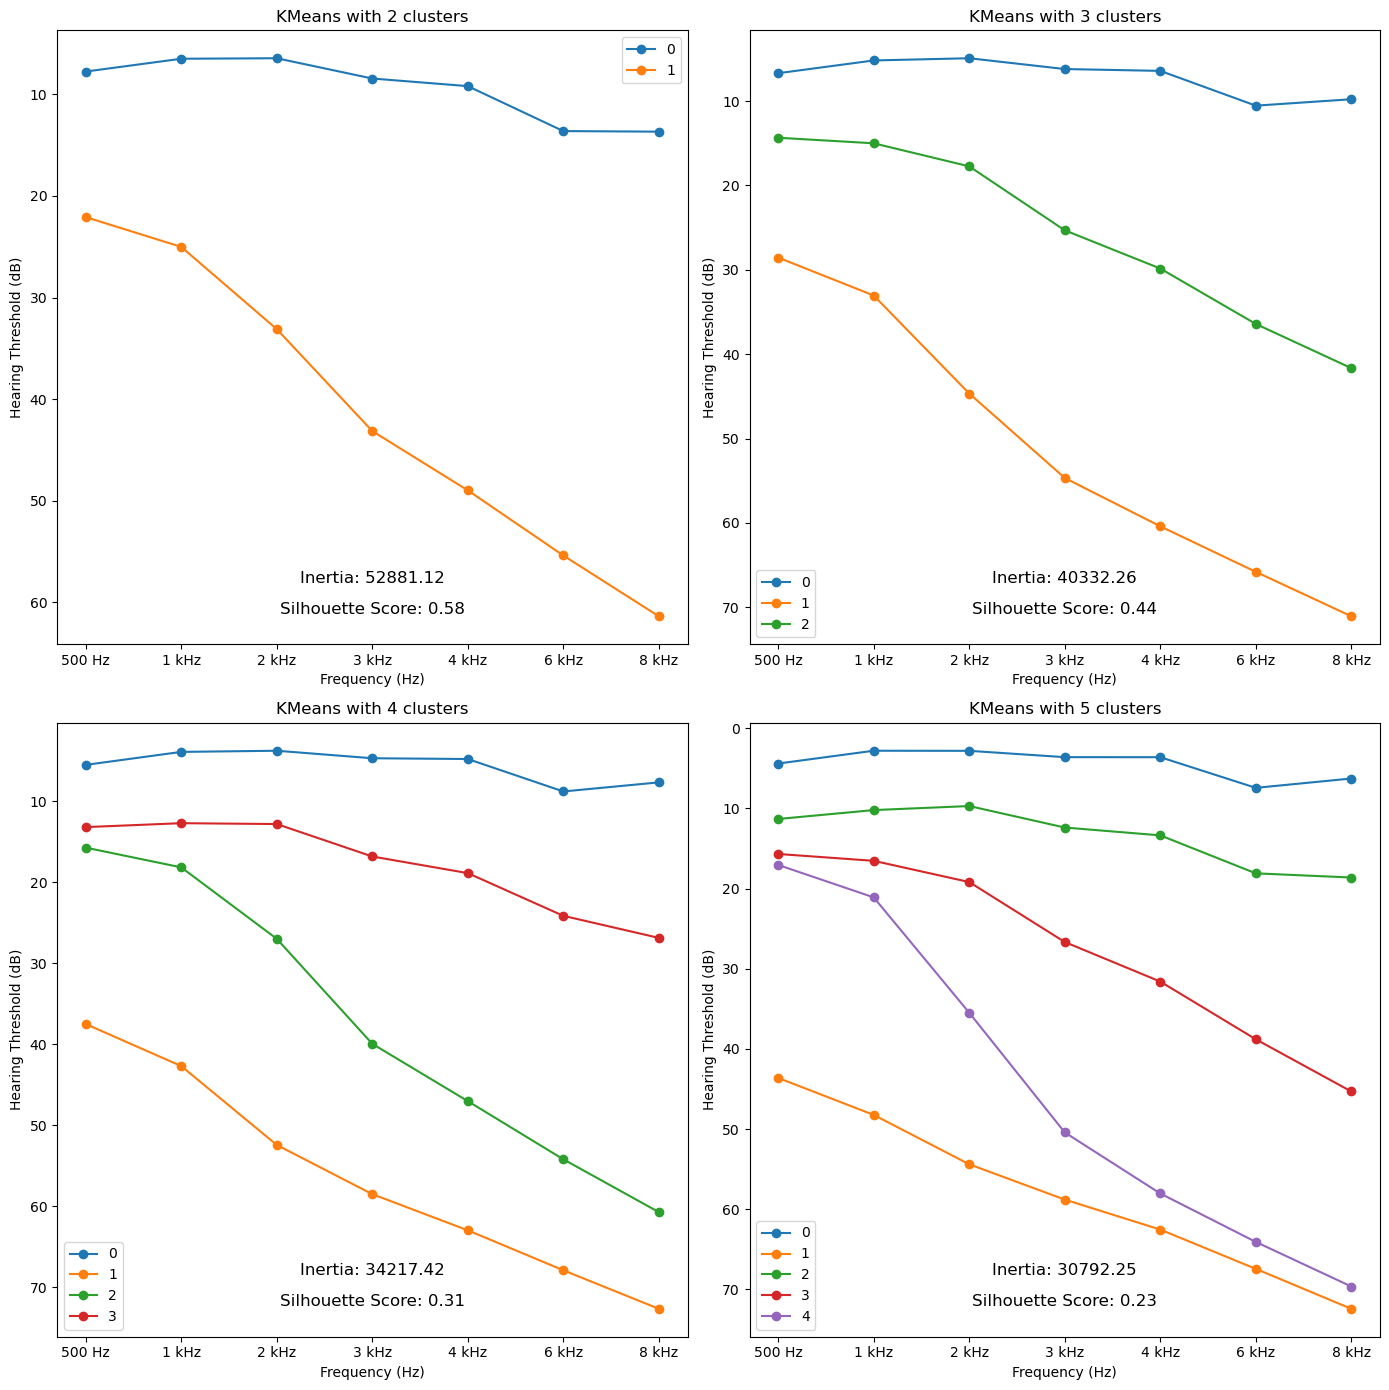

In [121]:
# Fit the K-Means algorithm with n clusters = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(14, 14))

for i in range(2, 6):
    # Initialize the KMeans object
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(standard_scaled_data)

    # Extract the centroids
    centroids = standard_scaler.inverse_transform(kmeans.cluster_centers_)
    centroids_df = pd.DataFrame(centroids, columns=ear_data.columns)

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'KMeans with {i} clusters')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()
    ax[row, col].legend(range(i))

    # Annotate the Silhouette Score
    ax[row, col].annotate(f'Silhouette Score: {silhouette_score(cleaned_ear_data, kmeans.labels_):.2f}', 
                          xy=(0.5, 0.05), xycoords='axes fraction', ha='center', fontsize=12)
    
    # Annotate the Inertia
    ax[row, col].annotate(f'Inertia: {kmeans.inertia_:.2f}', 
                          xy=(0.5, 0.10), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Examine the Age Distribution

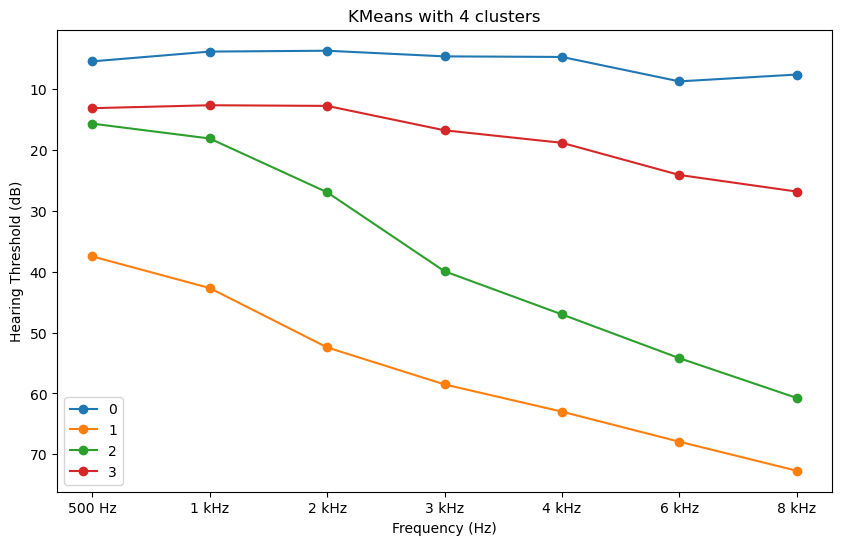

In [122]:
# Extract labels for 4 clusters

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(standard_scaled_data)
labels = kmeans.labels_

# Plot 4 clusters
centroids = standard_scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=ear_data.columns)
plt.figure(figsize=(10, 6))
plt.plot(centroids_df.T, marker='o')
plt.title('KMeans with 4 clusters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Hearing Threshold (dB)')
plt.gca().invert_yaxis()
plt.legend(range(4))
plt.show()

# Add the labels to the cleaned ear data
cleaned_ear_data['raw_label'] = labels

# Left join the age data from the data DataFrame

age_data = data[['RIDAGEYR']]
merged_data = cleaned_ear_data.merge(age_data, on='SEQN', how='left')

In [123]:
# Generate a table of age distribution by 4 clusters
summarized_table = merged_data.groupby('raw_label')['RIDAGEYR'].describe()
summarized_table.rename(index = {0: 'Blue', 1: 'Orange', 2: 'Green', 3: 'Red'}).sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
raw_label,,,,,,,,
Blue,8646.0,22.505089,13.735918,6.0,12.0,18.0,31.0,78.0
Red,4638.0,44.583226,19.994799,6.0,30.0,48.0,60.0,80.0
Green,2285.0,64.549672,13.550154,6.0,59.0,67.0,74.0,80.0
Orange,941.0,68.054198,15.912468,6.0,63.0,74.0,80.0,80.0


# K-Means for Percentile

In [124]:
# Replace original values with percentiles
ranked_ear_data = cleaned_ear_data.rank(method='average', pct=True).drop('raw_label', axis=1)
ranked_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,0.553846,0.355542,0.358237,0.713598,0.780769,0.663598,0.820351
83733,0.553846,0.750636,0.933979,0.945033,0.940884,0.887038,0.894670
83735,0.913053,0.899758,0.884706,0.713598,0.845488,0.805966,0.843973
83736,0.553846,0.591217,0.563901,0.620654,0.462901,0.465657,0.574440
83741,0.302180,0.130103,0.358237,0.296941,0.296154,0.578134,0.477408
...,...,...,...,...,...,...,...
124784,0.983586,0.984737,0.964022,0.925227,0.897759,0.836130,0.965082
124786,0.099425,0.591217,0.563901,0.296941,0.137311,0.465657,0.118716
124787,0.853301,0.591217,0.358237,0.296941,0.296154,0.326560,0.229104


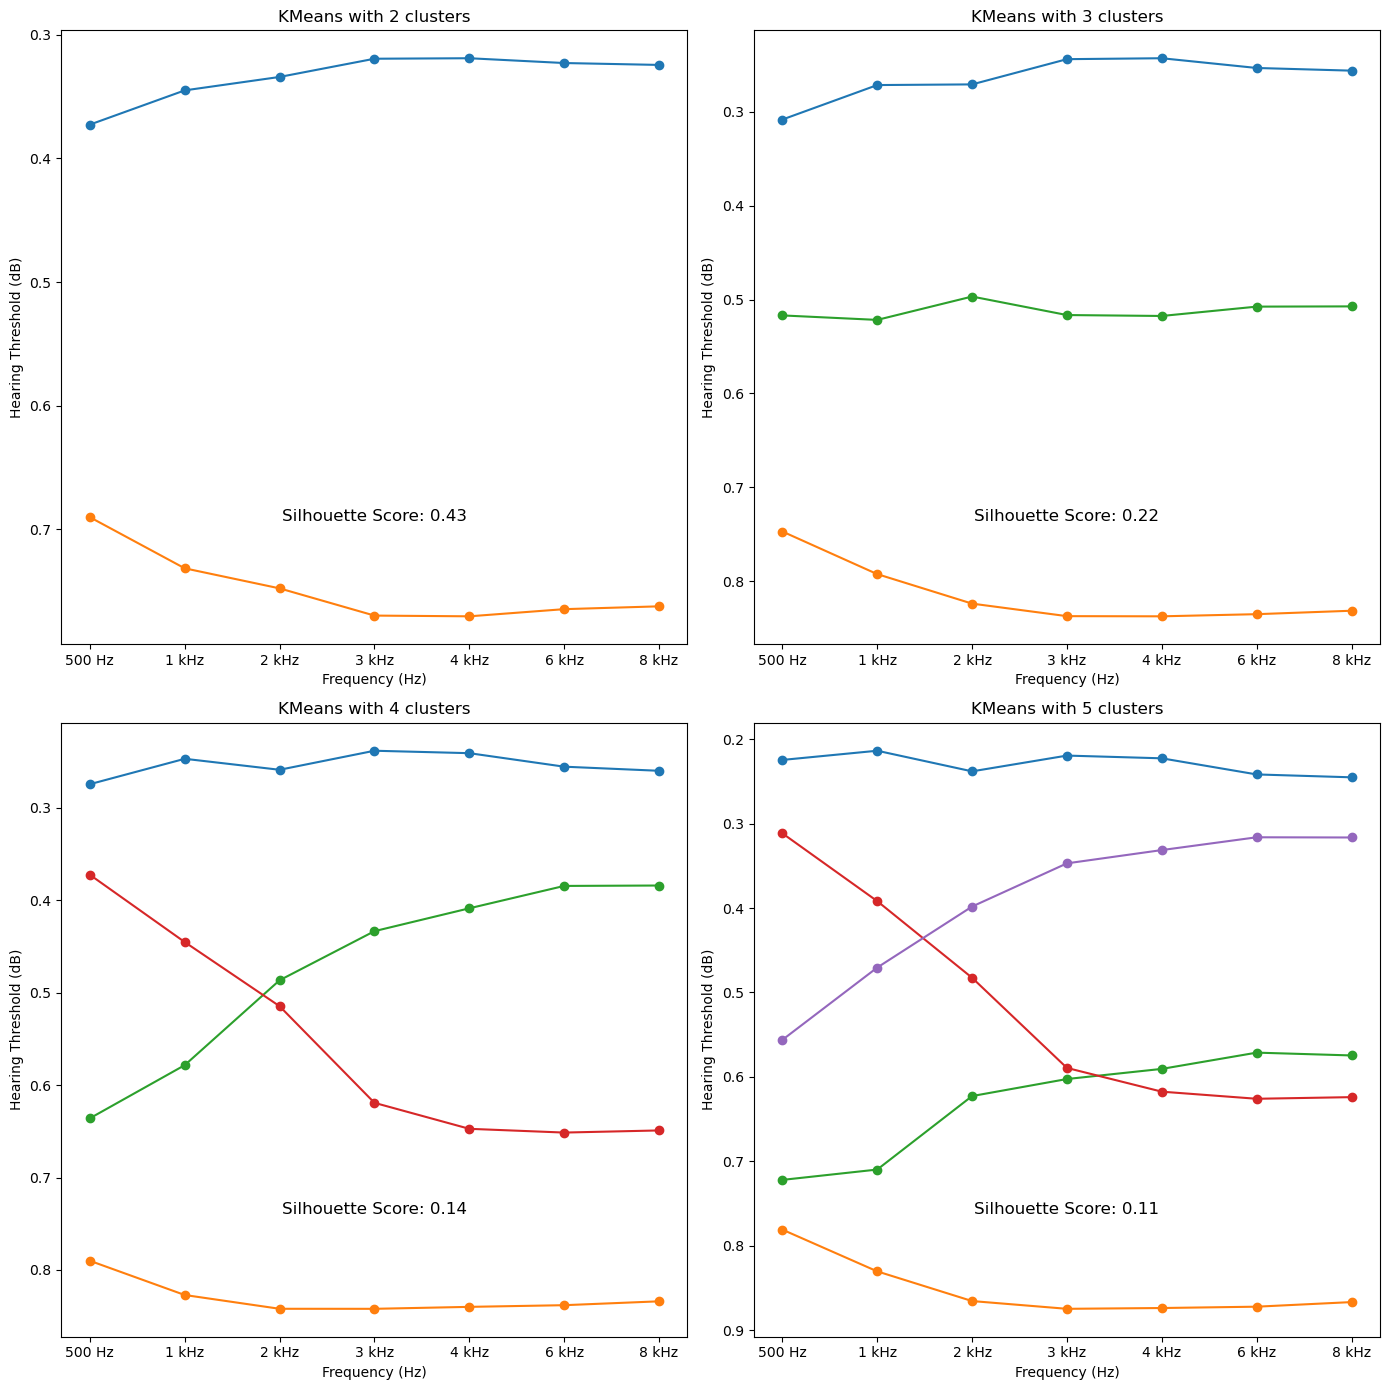

In [125]:
# Fit the K-Means algorithm with n clusters = 2, 3, 4, 5

fig, ax = plt.subplots(2, 2, figsize=(14, 14))

for i in range(2, 6):
    # Initialize the KMeans object
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(ranked_ear_data)

    # Extract the centroids
    centroids = kmeans.cluster_centers_
    centroids_df = pd.DataFrame(centroids, columns=ear_data.columns)

    # Plot the line plot
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'KMeans with {i} clusters')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()

    # Annotate the Silhouette Score
    # ax[row, col].annotate(f"Silhouette Score: {silhouette_score(ranked_ear_data, kmeans.labels_):.2f}", 
    #                       xy=(0.5, 0.20), xycoords='axes fraction', ha='center', fontsize=12)
    ax[row, col].annotate(f"Silhouette Score: {silhouette_score(cleaned_ear_data.drop('raw_label', axis=1), kmeans.labels_):.2f}", 
                          xy=(0.5, 0.20), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## Reverse mapping back to original values

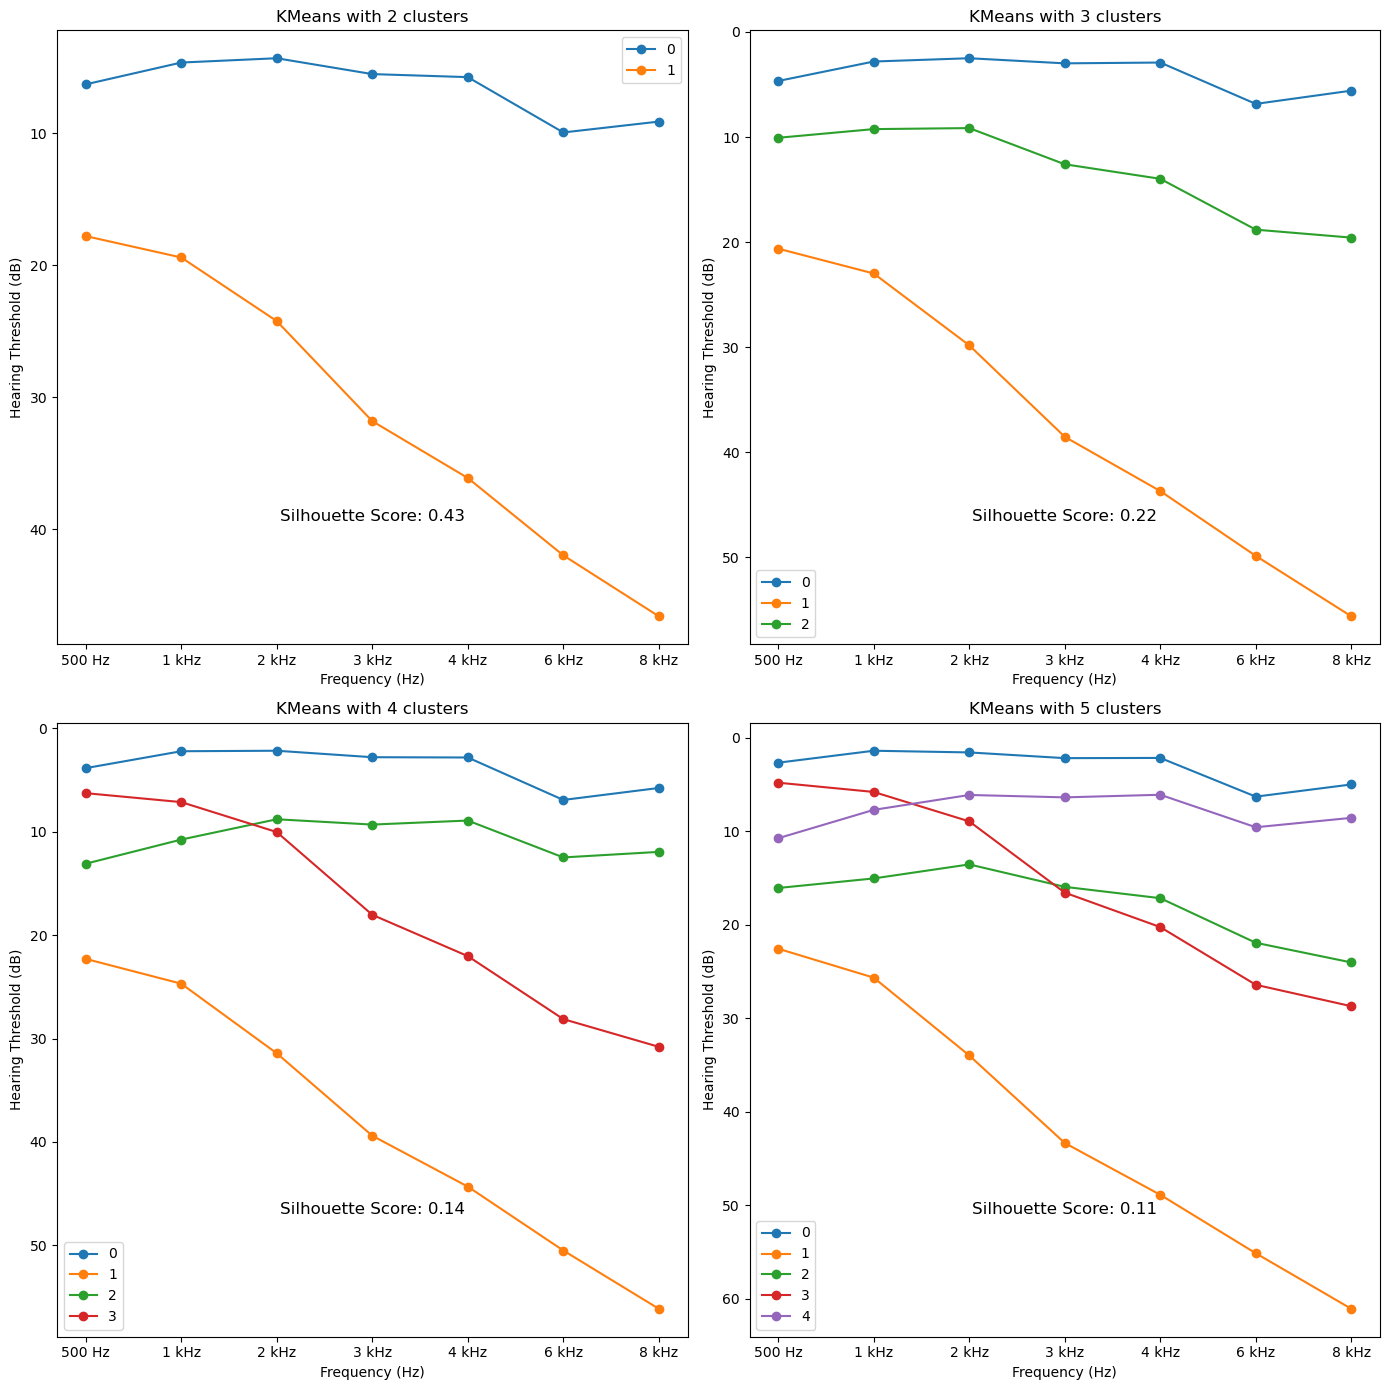

In [91]:
# Fit KMeans with n clusters = 2, 3, 4, 5
fig, ax = plt.subplots(2, 2, figsize=(14, 14))

for i in range(2, 6):
    # Initialize and fit the KMeans object
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(ranked_ear_data)

    # Assign labels back to the original dataset
    temp_df = cleaned_ear_data.copy()
    temp_df[f'pct_label_{i}'] = kmeans.labels_

    # Compute the centroids by taking the mean of each cluster's members in the cleaned_ear_data
    centroids_df = temp_df.groupby(f'pct_label_{i}').mean().drop(columns='raw_label')

    # Plot the line plot for each centroid
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax[row, col].plot(centroids_df.T, marker='o')
    ax[row, col].set_title(f'KMeans with {i} clusters')
    ax[row, col].set_xlabel('Frequency (Hz)')
    ax[row, col].set_ylabel('Hearing Threshold (dB)')
    ax[row, col].invert_yaxis()
    ax[row, col].legend(range(i))

    # Calculate and annotate the Silhouette Score using the clustered labels
    silhouette = silhouette_score(cleaned_ear_data.drop('raw_label', axis=1), kmeans.labels_)
    ax[row, col].annotate(f'Silhouette Score: {silhouette:.2f}', 
                          xy=(0.5, 0.20), xycoords='axes fraction', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

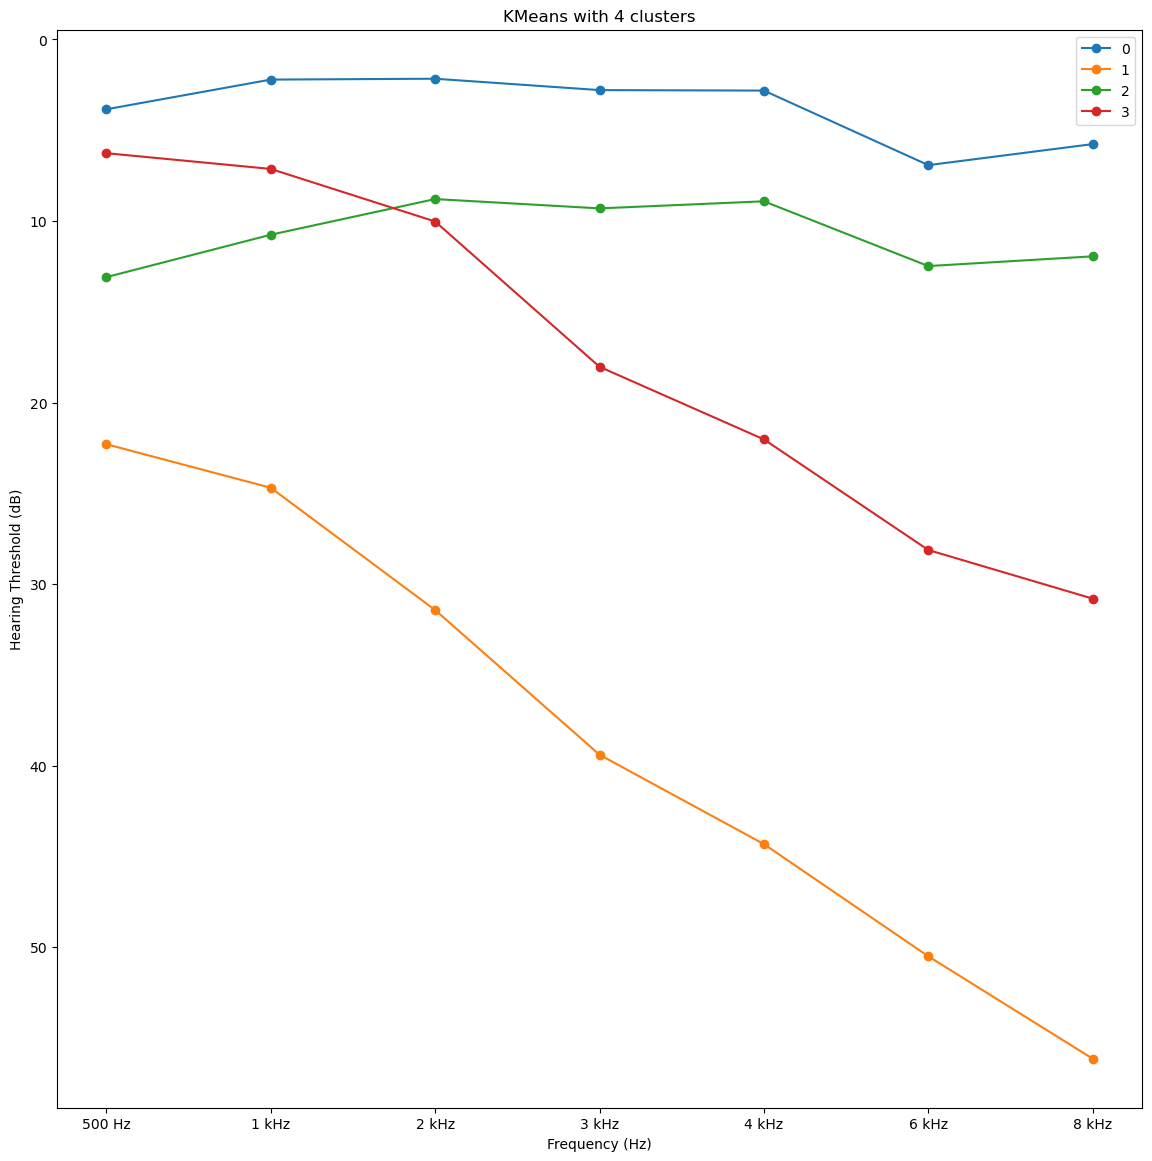

In [101]:
# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(ranked_ear_data)

# Assign labels back to the original dataset
cleaned_ear_data['pct_label'] = kmeans.labels_

# Compute the centroids by taking the mean of each cluster's members in the cleaned_ear_data
centroids_df = cleaned_ear_data.groupby('pct_label').mean().drop(columns='raw_label')

# Plot the line plot for each centroid
plt.figure(figsize=(14, 14))
plt.plot(centroids_df.T, marker='o')
plt.title('KMeans with 4 clusters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Hearing Threshold (dB)')
plt.gca().invert_yaxis()
plt.legend(range(4))
plt.show()


# Left join the age data from the data DataFrame
merged_data = cleaned_ear_data.merge(age_data, on='SEQN', how='left')

In [102]:
# Create a summarized table of age distribution by 4 clusters
summarized_table = merged_data.groupby('pct_label')['RIDAGEYR'].describe()
summarized_table.rename(index={0: 'Blue', 1: 'Orange', 2: 'Green', 3: 'Red'}).sort_values(by='mean', ascending=True)

,count,mean,std,min,25%,50%,75%,max
pct_label,,,,,,,,
Blue,5755.0,20.224153,11.626851,6.0,12.0,17.0,26.0,74.0
Green,3682.0,27.102662,17.053085,6.0,12.0,23.0,40.0,80.0
Red,3002.0,47.303131,17.923308,6.0,36.0,49.0,61.0,80.0
Orange,4071.0,62.565709,16.403498,6.0,55.0,66.0,75.0,80.0


In [103]:
crosstab = pd.crosstab(cleaned_ear_data['raw_label'], cleaned_ear_data['pct_label'])
crosstab

pct_label,0,1,2,3
raw_label,,,,
0,5755,0,2152,739
1,0,941,0,0
2,0,2002,0,283
3,0,1128,1530,1980
